In [61]:
# Instalar paquetes necesarios
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [62]:
# Supongamos que estos son los voltajes (en voltios) medidos durante la descarga del capacitor
voltajes = [7.19, 6.4, 4.21, 2.73, 2.05]  # Ejemplo de voltajes medidos
tiempo_inicial = 0  # El tiempo inicial es 0
tiempo_final = 10  # Ejemplo de tiempo final en segundos

# Estimamos tiempos intermedios suponiendo una distribución equitativa
tiempos = np.linspace(tiempo_inicial, tiempo_final, len(voltajes))

print(tiempos)

# Definimos la función de descarga de un capacitor
def modelo_descarga(t, Vb, RC):
    return Vb * np.exp(-t / RC)

[ 0.   2.5  5.   7.5 10. ]


In [63]:
# Ajustamos el modelo a los datos para encontrar Vb y RC
parametros_optimizados, _ = curve_fit(
    modelo_descarga,
    tiempos,
    voltajes,
    p0=[voltajes[0], (tiempo_final - tiempo_inicial) / 3],
)

Vb_estimado, RC_estimado = parametros_optimizados
print(Vb_estimado)
print(RC_estimado)

7.607998645458422
8.236895462411667


In [64]:
# Usamos los parámetros optimizados para generar la curva de descarga
tiempos_modelo = np.linspace(tiempo_inicial, tiempo_final, 100)
voltajes_modelo = modelo_descarga(tiempos_modelo, Vb_estimado, RC_estimado)

print(tiempos_modelo)
print(voltajes_modelo)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

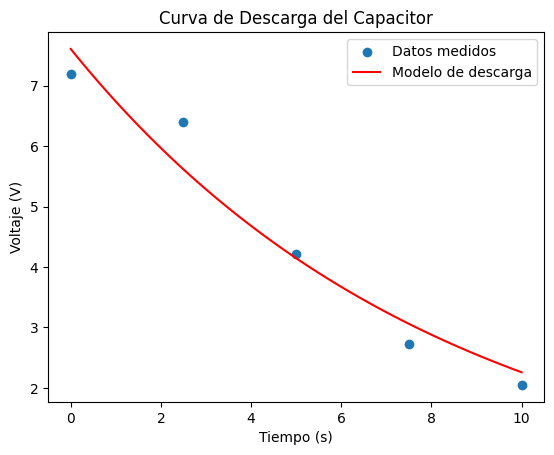

In [65]:
# Graficamos los datos y el modelo
plt.scatter(tiempos, voltajes, label="Datos medidos")
plt.plot(tiempos_modelo, voltajes_modelo, label="Modelo de descarga", color="red")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.title("Curva de Descarga del Capacitor")
plt.legend()
plt.show()